In [1]:
#debug用

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from models.models import *
#自作モジュール
from models import my_cv
from models import path

(4032, 3024, 3)


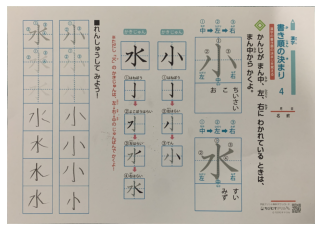

In [4]:

img_ori = cv2.imread('./sample_images/work6.png')#画像読み込み
print(np.shape(img_ori))
#my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper,output_file_path = "./tmp/paper.png")


In [2]:
img_paper = cv2.imread('./tmp/paper.png')#debug用
print(np.shape(img_paper))
paper = Paper(img_paper,"Sho","Mizu")

(2000, 2830, 3)


NameError: name 'img' is not defined

In [ ]:
#scoreの取得
score1s , score2s = paper.get_scores(False)

=====小======


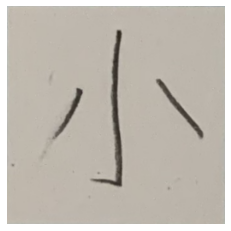

phase1
きれいに３ぼんせんがひけてるよ
result:True
phase2
２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめがまっすぐかけてるね
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:True
score:27
phase3
[1, '2かくめのおわりがきれいにはらえているね', 2]100
[2, '１かくめがしっかりはねれているね', 2]100
[2, '１かくめのはねのさきがきれいにはらえているね', 2]100
[3, '３かくめのさきがしっかりとめれているね', 2]85
score:19
phase4
total_score:96
=====小======


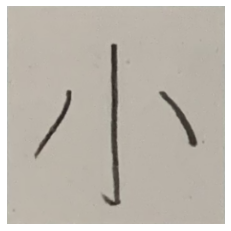

phase1
きれいに３ぼんせんがひけてるよ
result:True
phase2
２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめがまっすぐかけてるね
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:True
score:27
phase3
[1, '2かくめのおわりがきれいにはらえているね', 2]100
[2, '１かくめがしっかりはねれているね', 2]100
[2, '１かくめのはねのさきがきれいにはらえているね', 2]100
[3, '３かくめのさきがしっかりとめれているね', 2]99
score:19
phase4
total_score:96
=====小======


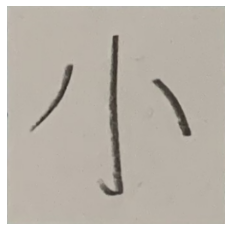

phase1
きれいに３ぼんせんがひけてるよ
result:True
phase2
２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめがまっすぐかけてるね
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:True
score:27
phase3
[1, '2かくめのおわりがきれいにはらえているね', 2]100
[2, '１かくめがしっかりはねれているね', 2]100
[2, '１かくめのはねのさきがきれいにはらえているね', 2]99
[3, '３かくめのさきがしっかりとめれているね', 2]99
score:19
phase4
total_score:96
=====小======


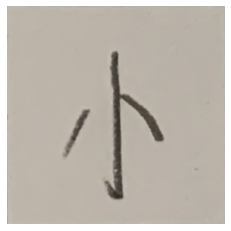

phase1
かんじのかたちがへんだよ
result:False
phase2
result:True
score:30
phase3
score:0
phase4
total_score:30
=====水======


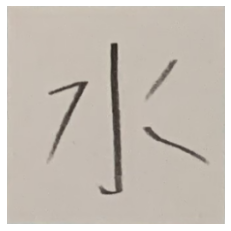

phase1
かんじのかたちがへんだよ
result:False
phase2
result:True
score:30
phase3
score:0
phase4
total_score:30
=====水======


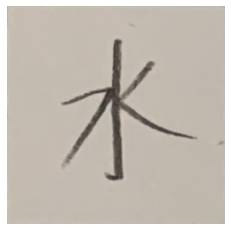

phase1
かんじのかたちがへんだよ
result:False
phase2
result:True
score:30
phase3
score:0
phase4
total_score:30
=====水======


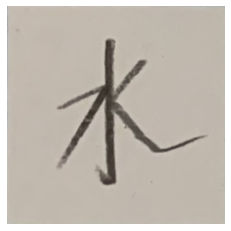

phase1
かんじのかたちがへんだよ
result:False
phase2
result:True
score:30
phase3
score:0
phase4
total_score:30
=====水======


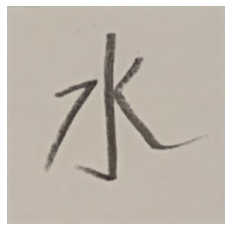

phase1
ただしくせんがひけてるね
result:True
phase2
２かくめがきれいにかけてるね
１かくめのせんがまっすぐかけてるね
３かくめがきれいにかけてるね
４かくめがしっかりかけてるね
result:True
score:27
phase3
[1, '２かくめのさきがしっかりはらえているね', 2]100
[2, '１かくめがしっかりはねれているね', 2]100
[3, '１かくめのさきがしっかりはらえているね', 2]100
[4, '４かくめのさきがしっかりはらえているね', 2]100
score:20
phase4
total_score:97


In [5]:
for score in score1s:
    score.print_debug()
for score in score2s:
    score.print_debug()

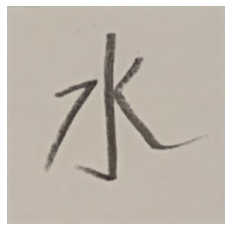

In [6]:
score = score2s[3]
my_cv.display_color(score.get_img())
items = score.items_phase3

====1=====
1


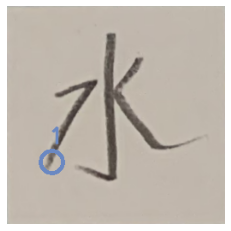

====2=====
1


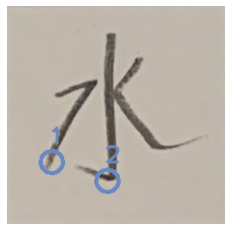

====3=====
1


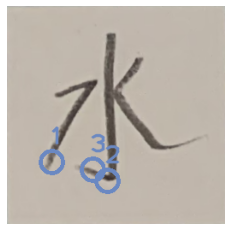

====4=====
1


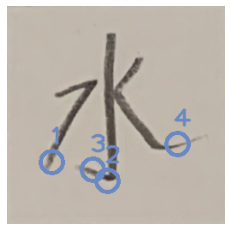

In [7]:
#phase3の丸つけるやつのデバッグ
def _plot_phase3_item(img,idx,centroid,color):
    img = cv2.circle(img,centroid, 13, color, 3)
    cv2.putText(img, str(idx), (centroid[0]-4, centroid[1]-20), cv2.FONT_HERSHEY_PLAIN, 2, color, 2, cv2.LINE_AA)
    return img
img = np.copy(score.img_char)
BLUE = (194,136,106)
YELLOW = (0,217,255)
RED = (65,83,215)
for i in range(1,score.items_phase3_idx+1):
    print("===="+str(i)+"=====")
    stack_score = list()
    temp_item = None
    for item in score.items_phase3:
        if item.idx == i:
            stack_score.append(item.get_score())
            temp_item = item
    print(len(stack_score))
    ave = np.average(stack_score)
    if ave > 80 :#正解
        _plot_phase3_item(img,i,temp_item.get_centroid(),BLUE)
    elif ave > 20:#さんかく
        _plot_phase3_item(img,i,temp_item.get_centroid(),YELLOW)
    else:
        _plot_phase3_item(img,i,temp_item.get_centroid(),RED)
    my_cv.display_color(img)


In [5]:
char = paper.char1s[0]
result = np.copy(char.img_exp)
hsv = cv2.cvtColor(result, cv2.COLOR_RGB2HSV)
_, exp_thre = cv2.threshold(hsv[:,:,2], 100, 255, cv2.THRESH_BINARY)
char_thre = cv2.bitwise_not(char.img_thresh)
kuro_count =0 #黒字のカウント
in_count =0 #はみ出なかった黒字
for i in range(char_thre.shape[0]):
    for j in range(char_thre.shape[1]):
        if char_thre[i][j] == 0:#黒なら
            kuro_count += 1
            if exp_thre[i][j] == 0:
                in_count += 1
wariai = in_count /kuro_count
print(int(wariai*20))

NameError: name 'paper' is not defined